In [5]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
import numpy as np
from PIL import Image

ModuleNotFoundError: No module named 'pygame'

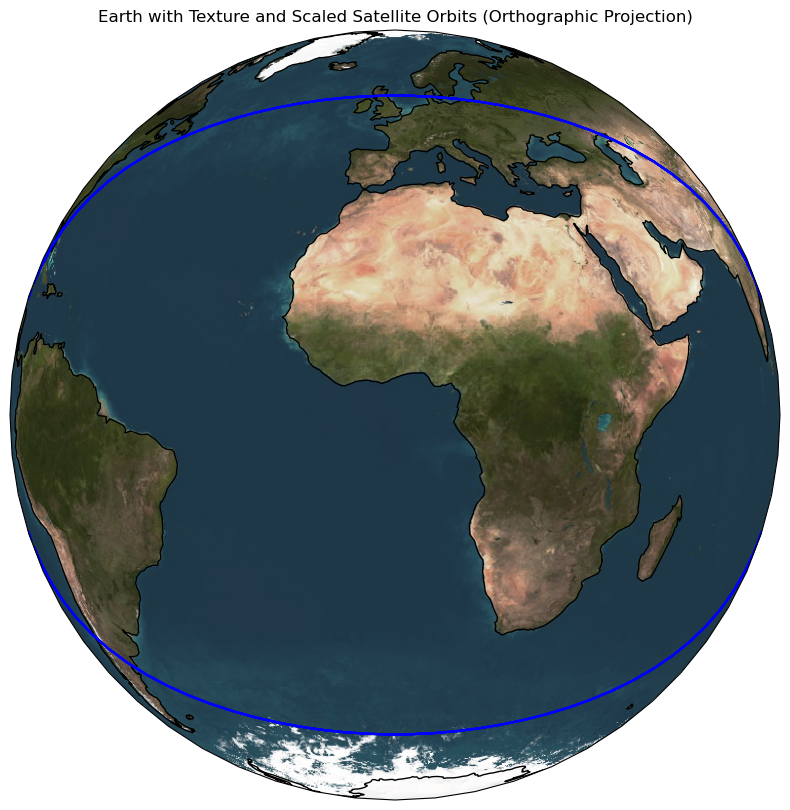

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from PIL import Image
import numpy as np

# Load the texture (Earth map)
image_path = 'map2.jpg'  # Your texture path
earth_image = Image.open(image_path)

# Earth and satellite constants
earth_radius = 6371  # Earth's radius in km
satellite_altitude = 5500  # Satellite altitude in km
orbit_radius = earth_radius + satellite_altitude  # Total radius for satellite orbit
orbit_inclination = 53  # Inclination angle in degrees

# Set up the figure with a Cartopy projection (Orthographic projection)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=0, central_latitude=0))

# Plot the Earth map texture
ax.imshow(np.array(earth_image), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

# Add coastlines for reference
ax.coastlines()

# Function to plot satellite orbit as an ellipse in orthographic projection
def plot_orbit(ax, inclination, scale_factor=10, color='red'):
    # Generate points for the orbit
    theta = np.linspace(0, 2 * np.pi, 100)
    
    # Parametric equation for an inclined circle (ellipse in orthographic projection)
    x = np.cos(theta) * orbit_radius * scale_factor  # x-coordinates for the orbit
    y = np.sin(theta) * orbit_radius * np.cos(np.radians(inclination)) * scale_factor  # y-coordinates for the orbit, adjusted by inclination
    
    # Plot the orbit in orthographic projection
    ax.plot(x / earth_radius, y / earth_radius, transform=ccrs.PlateCarree(), color=color, linewidth=1.5)

# Plot 6 orbital planes evenly spaced around the Earth
num_orbits = 6
for i in range(num_orbits):
    # Rotate each orbit plane by a different angle
    central_longitude = i * (360 / num_orbits)
    plot_orbit(ax, orbit_inclination, scale_factor=50, color='blue')  # Increase scale_factor for better visibility

# Show the plot with title
plt.title("Earth with Texture and Scaled Satellite Orbits (Orthographic Projection)")
plt.show()


In [3]:
pygame.init()
window_size = (800, 600)
pygame.display.set_mode(window_size, DOUBLEBUF | OPENGL)

# Set perspective
gluPerspective(45, (window_size[0] / window_size[1]), 0.1, 50.0)

# Move the "camera" back to see the object
glTranslatef(0.0, 0.0, -5)

# Enable textures
glEnable(GL_TEXTURE_2D)

# Load the texture (Earth map)
def load_texture(image_path):
    earth_image = Image.open(image_path)
    earth_image = earth_image.transpose(Image.FLIP_TOP_BOTTOM)  # Flip the image vertically
    img_data = earth_image.convert("RGB").tobytes()
    width, height = earth_image.size
    
    texture_id = glGenTextures(1)
    glBindTexture(GL_TEXTURE_2D, texture_id)
    glTexImage2D(GL_TEXTURE_2D, 0, GL_RGB, width, height, 0, GL_RGB, GL_UNSIGNED_BYTE, img_data)
    
    glTexParameteri(GL_TEXTURE_2D, GL_TEXTURE_MIN_FILTER, GL_LINEAR)
    glTexParameteri(GL_TEXTURE_2D, GL_TEXTURE_MAG_FILTER, GL_LINEAR)
    
    return texture_id

# Load your texture
texture_id = load_texture('map2.jpg')  # Path to your texture

# Create a sphere with texture coordinates
def draw_sphere(radius, slices, stacks):
    for i in range(stacks):
        lat0 = np.pi * (-0.5 + float(i) / stacks)
        z0 = np.sin(lat0)
        zr0 = np.cos(lat0)

        lat1 = np.pi * (-0.5 + float(i + 1) / stacks)
        z1 = np.sin(lat1)
        zr1 = np.cos(lat1)

        glBegin(GL_QUAD_STRIP)
        for j in range(slices + 1):
            lng = 2 * np.pi * float(j) / slices
            x = np.cos(lng)
            y = np.sin(lng)

            glTexCoord2f(float(j) / slices, float(i) / stacks)
            glVertex3f(x * zr0 * radius, y * zr0 * radius, z0 * radius)

            glTexCoord2f(float(j) / slices, float(i + 1) / stacks)
            glVertex3f(x * zr1 * radius, y * zr1 * radius, z1 * radius)
        glEnd()

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)

    # Rotate the sphere
    glRotatef(1, 1, 1, 0)

    # Bind the texture and draw the sphere
    glBindTexture(GL_TEXTURE_2D, texture_id)
    draw_sphere(1, 40, 40)

    pygame.display.flip()
    pygame.time.wait(10)

# Clean up and quit
pygame.quit()

NameError: name 'pygame' is not defined

In [33]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
import numpy as np
from PIL import Image

# Initialize pygame and create an OpenGL context
pygame.init()
window_size = (800, 600)
pygame.display.set_mode(window_size, DOUBLEBUF | OPENGL)

# Set perspective
gluPerspective(45, (window_size[0] / window_size[1]), 0.1, 50.0)

# Move the "camera" back to see the object
glTranslatef(0.0, 0.0, -10)  # Move the camera back

# Enable textures
glEnable(GL_TEXTURE_2D)

# Set background color to white
glClearColor(1.0, 1.0, 1.0, 1.0)

# Load the texture (Earth map)
def load_texture(image_path):
    earth_image = Image.open(image_path)
    earth_image = earth_image.transpose(Image.FLIP_TOP_BOTTOM)  # Flip the image vertically
    img_data = earth_image.convert("RGB").tobytes()
    width, height = earth_image.size
    
    texture_id = glGenTextures(1)
    glBindTexture(GL_TEXTURE_2D, texture_id)
    glTexImage2D(GL_TEXTURE_2D, 0, GL_RGB, width, height, 0, GL_RGB, GL_UNSIGNED_BYTE, img_data)
    
    glTexParameteri(GL_TEXTURE_2D, GL_TEXTURE_MIN_FILTER, GL_LINEAR)
    glTexParameteri(GL_TEXTURE_2D, GL_TEXTURE_MAG_FILTER, GL_LINEAR)
    
    return texture_id

# Load your texture
texture_id = load_texture('map2.jpg')  # Path to your texture

# Create a sphere with texture coordinates (Earth)
def draw_sphere(radius, slices, stacks):
    for i in range(stacks):
        lat0 = np.pi * (-0.5 + float(i) / stacks)
        z0 = np.sin(lat0)
        zr0 = np.cos(lat0)

        lat1 = np.pi * (-0.5 + float(i + 1) / stacks)
        z1 = np.sin(lat1)
        zr1 = np.cos(lat1)

        glBegin(GL_QUAD_STRIP)
        for j in range(slices + 1):
            lng = 2 * np.pi * float(j) / slices
            x = np.cos(lng)
            y = np.sin(lng)

            glTexCoord2f(float(j) / slices, float(i) / stacks)
            glVertex3f(x * zr0 * radius, y * zr0 * radius, z0 * radius)

            glTexCoord2f(float(j) / slices, float(i + 1) / stacks)
            glVertex3f(x * zr1 * radius, y * zr1 * radius, z1 * radius)
        glEnd()

# Draw the satellite orbit as a circle at 550 km altitude
def draw_orbit(altitude, radius, slices):
    # Set the orbit color to blue
    glColor3f(0.0, 0.0, 1.0)  # Blue orbit
    glBegin(GL_LINE_LOOP)
    for i in range(slices):
        theta = 2.0 * np.pi * float(i) / float(slices)  # Angle around the circle
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        glVertex3f(x, y, altitude)
    glEnd()

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)

    # Rotate the Earth to face the USA (approx -100° longitude, 40° latitude)
    glPushMatrix()
    glRotatef(90, 1, 0, 0)  # Rotate so we can see the northern hemisphere
    glRotatef(-100, 0, 1, 0)  # Rotate to central longitude of USA (-100 degrees)

    # Draw Earth
    glEnable(GL_TEXTURE_2D)  # Enable texture mapping
    glBindTexture(GL_TEXTURE_2D, texture_id)  # Bind Earth texture
    glColor3f(1.0, 1.0, 1.0)  # Reset the color to white to avoid color contamination
    draw_sphere(1, 40, 40)  # Earth sphere with radius 1
    glDisable(GL_TEXTURE_2D)  # Disable textures after drawing Earth

    glPopMatrix()

    # Draw satellite orbit (at altitude of 550km, normalized)
    draw_orbit(0.09, 1.09, 100)  # Altitude 550km above Earth's radius

    pygame.display.flip()
    pygame.time.wait(10)

# Clean up and quit
pygame.quit()
